In [1]:
from pyforest import *

In [2]:
train = pd.read_csv("~/Downloads/Titanic/train.csv")

In [3]:
test =pd.read_csv("~/Downloads/Titanic/test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Combining Train and Test
combined = pd.concat([train,test], ignore_index = True, sort = False)

In [6]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Survived     418
Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [7]:
combined[combined.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [8]:
# Find Embarked
df= pd.DataFrame(combined.groupby(["Survived", "Sex"])["Embarked"].value_counts())

In [9]:
df.plot(kind = "barh")

# This plot shows that majority of Females who survived were from Southampton

In [10]:
# Filling S in Embarked
combined.loc[combined.Embarked.isnull(),"Embarked"]="S"

In [11]:
# Fare
combined[combined.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


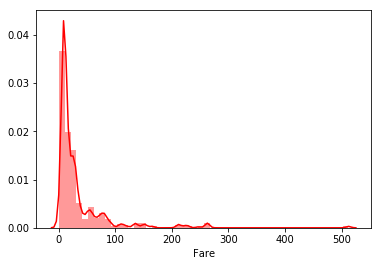

In [12]:
# Lets Find the Relation between Fare and PClass
sns.distplot(combined.Fare.dropna(), color = "red")

In [13]:
pd.DataFrame(combined.groupby(["Survived", "Sex", "Pclass"])["Fare"].describe())

count        mean         std      min       25%  \
Survived Sex    Pclass                                                     
0.0      female 1         3.0  110.604167   70.920264  28.7125  90.13125   
                2         6.0   18.250000    6.969577  10.5000  13.00000   
                3        72.0   19.773093   14.572275   6.7500   8.53125   
         male   1        77.0   62.894910   60.052545   0.0000  27.72080   
                2        91.0   19.488965   15.720548   0.0000  11.50000   
                3       300.0   12.204469   10.984904   0.0000   7.75000   
1.0      female 1        91.0  105.978159   74.738897  25.9292  57.48960   
                2        70.0   22.288989   11.140937  10.5000  13.00000   
                3        72.0   12.464526    5.984714   7.2250   7.75000   
         male   1        45.0   74.637320  101.091948  26.2875  29.70000   
                2        17.0   21.095100    9.832542  10.5000  13.00000   
                3        47.0   15.579696   15.232388   0.0000   7.82500   

                              50%         75%       max  
Survived Sex    Pclass                                   
0.0      female 1       151.55000  151.550000  151.5500  
                2        17.00000   24.750000   26.0000  
                3        14.47915   26.075025   69.5500  
         male   1        42.40000   77.287500  263.0000  
                2        13.00000   26.000000   73.5000  
                3         7.89580    9.500000   69.5500  
1.0      female 1        82.17080  134.075000  512.3292  
                2        23.00000   26.250000   65.0000  
                3         9.46875   15.912500   31.3875  
         male   1        35.50000   79.200000  512.3292  
                2        18.75000   26.000000   39.0000  
                3         8.05000   15.820850   56.4958

In [14]:
# Putting Median for male where the Pclass is 3
combined.loc[(combined.Pclass ==3) & (combined.Sex=="male") & (combined.Fare.isnull()), "Fare"] = 7.89580

In [15]:
# Age
combined[combined.Age.isnull()]["Cabin"].unique()

array([nan, 'B78', 'C52', 'F E69', 'E33', 'A32', 'A19', 'C106', 'E101',
       'C128', 'D21', 'A14', 'C95', 'C126', 'C124', 'D45', 'F38', 'B102',
       'C47', 'C92', 'D34', 'E46', 'F E46', 'D'], dtype=object)

In [16]:
combined.Cabin.dropna().unique()

array(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       'E24

In [17]:
# Cabin
cabincount = ['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       'E24', 'C90', 'C45', 'E8', 'B101', 'D45', 'C46', 'D30', 'E121',
       'D11', 'E77', 'F38', 'B3', 'D6', 'B82 B84', 'D17', 'A36', 'B102',
       'B69', 'E49', 'C47', 'D28', 'E17', 'A24', 'C50', 'B42', 'C148',
       'B45', 'B36', 'A21', 'D34', 'A9', 'C31', 'B61', 'C53', 'D43',
       'C130', 'C132', 'C55 C57', 'C116', 'F', 'A29', 'C6', 'C28', 'C51',
       'C97', 'D22', 'B10', 'E45', 'E52', 'A11', 'B11', 'C80', 'C89',
       'F E46', 'B26', 'F E57', 'A18', 'E60', 'E39 E41', 'B52 B54 B56',
       'C39', 'B24', 'D40', 'D38', 'C105']

In [18]:
def cabins(x):
    if(x in cabincount):
        return("Cabin Allotted")
    else:
        return("No Cabin Found")

In [19]:
combined["Cabin_Status"] = pd.Series(combined.Cabin.apply(cabins))

In [20]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Status
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No Cabin Found
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cabin Allotted
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,No Cabin Found
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Cabin Allotted
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No Cabin Found


In [21]:
# Extracting Title from Name
g = combined.Name.transform(lambda x:x.split(", ")[1])
titles = g.transform(lambda x:x.split(". ")[0])

In [22]:
combined["Titles"] = pd.Series(titles)

In [23]:
titles_ignore = ['Don', 'Rev', 'Dr', 'Mme','Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
                 'Jonkheer', 'Dona']

In [24]:
def titleignore(x):
    if(x in(titles_ignore)):
        return("Others")
    else:
        return(x)

In [25]:
combined["Titles"] = combined.Titles.apply(titleignore)

In [26]:
# SIBSP and Parch
family = combined.SibSp+combined.Parch

In [27]:
family.replace(to_replace = 0, value =1,inplace = True)

In [28]:
combined["Family"] = pd.Series(family)

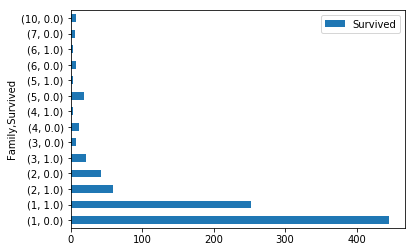

In [29]:
# Lets evaluate Family and Survival
pd.DataFrame(combined.groupby("Family")["Survived"].value_counts()).plot(kind = "barh")
# Singles have better survival chances
# Anything beyond 03 members had a rare chance of survival

In [30]:
def family_cat(x):
    if(x ==1):
        return("Singles")
    elif((x>1) & (x<3)):
        return("Small Family")
    else:
        return("Large Family")

In [31]:
combined["Family_On_Board"] = pd.Series(combined.Family.apply(family_cat))

In [32]:
# Age is Dependent on the gender in Titanic. 
combined.groupby(["Sex", "Pclass"])["Age"].describe().T

Sex         female                                male                       
Pclass           1           2           3           1          2           3
count   133.000000  103.000000  152.000000  151.000000  158.00000  349.000000
mean     37.037594   27.499223   22.185329   41.029272   30.81538   25.962264
std      14.272460   12.911747   12.205254   14.578529   13.97740   11.682415
min       2.000000    0.920000    0.170000    0.920000    0.67000    0.330000
25%      24.000000   20.000000   16.000000   30.000000   23.00000   20.000000
50%      36.000000   28.000000   22.000000   42.000000   29.50000   25.000000
75%      48.000000   34.000000   30.000000   50.000000   38.75000   32.000000
max      76.000000   60.000000   63.000000   80.000000   70.00000   74.000000

In [33]:
combined["Fare_Per_Person"] = combined.Fare/combined.Family

In [34]:
("McGowan, Miss. Anna Annie").split()[1][:-1]

'Miss'

In [35]:
titles = []
for i in combined.Name:
    titles.append(i.split()[1][:-1])

In [36]:
combined.Name[1279].split()[1][:-1]

'Mr'

In [37]:
d = pd.DataFrame(titles, columns = ["titles"])

In [38]:
combined["titles"] = d

In [39]:
agena = combined[combined.Age.isnull()]

In [40]:
agena.head()
# Rule Formation:
# 1. Person is Male or Female & PClass & Survival
# 2. Title
# 3. Family_On_Board and their Survival

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Status,Titles,Family,Family_On_Board,Fare_Per_Person,titles
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,No Cabin Found,Mr,1,Singles,8.4583,Mr
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,No Cabin Found,Mr,1,Singles,13.0000,Mr
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,No Cabin Found,Mrs,1,Singles,7.2250,Mrs
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,No Cabin Found,Mr,1,Singles,7.2250,Mr
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,No Cabin Found,Miss,1,Singles,7.8792,Miss


# Rule Formation:
1. Person is Male or Female & PClass & Survival
2. Title
3. Family_On_Board and their Survival

In [41]:
# Libraries for ANOVA
import scipy.stats as stats
#import statsmodels.api as sms
from statsmodels.formula.api import ols

In [42]:
# stats.f_oneway(data_group1, data_group2, data_group3, data_groupN)

stats.f_oneway(combined.loc[combined["Pclass"]==1]["Age"].dropna(),
               combined.loc[combined["Pclass"]==2]["Age"].dropna(),
               combined.loc[combined["Pclass"]==3]["Age"].dropna()) 

# P value shows that Pclass has an impact on the Age

F_onewayResult(statistic=108.32631005902482, pvalue=1.796708368328782e-43)

In [43]:
# model_name = ols('outcome_variable ~ group1 + group2 + groupN', data=your_data).fit()
model = ols("Age~Sex+Pclass", data = combined).fit()

In [44]:
model.summary()
# This shows that Gender has an impact on the Age Variable

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     116.0
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.32e-46
Time:                        21:40:44   Log-Likelihood:                -4169.6
No. Observations:                1046   AIC:                             8345.
Df Residuals:                    1043   BIC:                             8360.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      43.6462      1.194     36.555      0.000      41.303      45.989
Sex[T.male]     3.7375      0.844      4.428      0.000       2.081       5.394
Pclass         -7.3008      0.485    -15.059      0.000      -8.252      -6.349
==============================================================================
Omnibus:                       14.009   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.798
Skew:                           0.242   Prob(JB):                     0.000612
Kurtosis:                       3.324   Cond. No.                         8.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Printing Model Diagnostics

1. The Durban-Watson tests is to detect the presence of autocorrelation (not provided when calling diagnostics this way), 
2. Jarque-Bera (jb; jbpv is p-value) tests the assumption of normality, 
3. Omnibus (omni; omnipv is p-value) tests the assumption of homogeneity of variance, and the 
4. Condition Number (condno) assess multicollinearity. Condition Number values over 20 are indicative of multicollinearity.

If the omnibus test were to be significant, an option on how to handle it would be to use a heteroscedasticity corrected coefficient covariance matrix in the .anova_lm() method. This corrects the calculations to account for the heteroscedasticity present.

In [45]:
print(model.diagn)

{'jb': 14.798044019974306, 'jbpv': 0.0006118508526413737, 'skew': 0.24201445096876661, 'kurtosis': 3.3244233236232192, 'omni': 14.009155048436545, 'omnipv': 0.000907717342875599, 'condno': 8.415821899016247, 'mineigval': 101.45754885423172}


In [46]:
# Checking if Title has an impact on Age
model_age = ols("Age~Titles", data = combined).fit()
model_age.summary()

# Apart from Ms, titles have significant impact on the Age

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     84.40
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.70e-74
Time:                        21:40:44   Log-Likelihood:                -4096.5
No. Observations:                1046   AIC:                             8205.
Df Residuals:                    1040   BIC:                             8235.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.4826      1.674      3.275      0.001       2.198       8.767
Titles[T.Miss]      16.2916      1.873      8.697      0.000      12.616      19.967
Titles[T.Mr]        26.7695      1.749     15.310      0.000      23.338      30.201
Titles[T.Mrs]       31.5115      1.917     16.437      0.000      27.750      35.273
Titles[T.Ms]        22.5174     12.300      1.831      0.067      -1.619      46.653
Titles[T.Others]    37.6464      2.755     13.663      0.000      32.240      43.053
==============================================================================
Omnibus:                       89.071   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.504
Skew:                           0.759   Prob(JB):                     1.01e-24
Kurtosis:                       3.479   Cond. No.                         38.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# Check Family on Board
model_family = ols("Age~Family_On_Board", data=combined).fit()
model_family.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     39.69
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.45e-17
Time:                        21:40:44   Log-Likelihood:                -4236.3
No. Observations:                1046   AIC:                             8479.
Df Residuals:                    1043   BIC:                             8493.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          19.8208      1.351     14.673      0.000      17.170      22.472
Family_On_Board[T.Singles]         12.0055      1.438      8.349      0.000       9.184      14.827
Family_On_Board[T.Small Family]     6.7132      1.780      3.772      0.000       3.221      10.206
==============================================================================
Omnibus:                       67.941   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.073
Skew:                           0.674   Prob(JB):                     4.10e-18
Kurtosis:                       3.141   Cond. No.                         7.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Since ANOVA tests that Family On Board, Title, PClass and Gender are significant variables and hence we need to fill the median age basis these variables

In [48]:
combined.loc[(combined["Pclass"]==1) & (combined["Sex"]=="female") & (combined["Titles"]=="Miss") & (combined["Family_On_Board"]=="Singles") & (combined["Age"].isnull()), "Age"]=31.0
combined.loc[(combined["Pclass"]==1) & (combined["Sex"]=="female") & (combined["Titles"]=="Mrs") & (combined["Family_On_Board"]=="Singles") & (combined["Age"].isnull()), "Age"]=44.0
combined.loc[(combined["Pclass"]==1) & (combined["Sex"]=="male") & (combined["Titles"]=="Mr") & (combined["Family_On_Board"]=="Singles") & (combined["Age"].isnull()), "Age"] = 41.0
combined.loc[(combined["Pclass"]==1) & (combined["Sex"]=="male") & (combined["Titles"]=="Others") & (combined["Family_On_Board"]=="Singles") & (combined["Age"].isnull()), "Age"]=48.0
combined.loc[(combined["Pclass"]==2) & (combined["Sex"]=="female") & (combined["Titles"]=="Miss") & (combined["Family_On_Board"]=="Singles") & (combined["Age"].isnull()), "Age"]=26.5
combined.loc[(combined["Pclass"]==2) & (combined["Sex"]=="female") & (combined["Titles"]=="Mrs") & (combined["Family_On_Board"]=="Singles") & (combined["Age"].isnull()), "Age"]=29.5
combined.loc[(combined["Pclass"]==2) & (combined["Sex"]=="male") & (combined["Titles"]=="Mr") & (combined["Family_On_Board"]=="Singles") & (combined["Age"].isnull()), "Age"]=30.0
combined.loc[(combined["Pclass"]==3) & (combined["Sex"]=="female") & (combined["Titles"]=="Miss") & (combined["Family_On_Board"]=="Large Family") & (combined["Age"].isnull()), "Age"] = 8.0
combined.loc[(combined["Pclass"]==3) & (combined["Sex"]=="female") & (combined["Titles"]=="Miss") & (combined["Family_On_Board"]=="Singles") & (combined["Age"].isnull()), "Age"] = 22.0
combined.loc[(combined["Pclass"]==3) & (combined["Sex"]=="female") & (combined["Titles"]=="Miss") & (combined["Family_On_Board"]=="Small Family") & (combined["Age"].isnull()), "Age"] = 4.0
combined.loc[(combined["Pclass"]==3) & (combined["Sex"]=="female") & (combined["Titles"]=="Mrs") & (combined["Family_On_Board"]=="Large Family") & (combined["Age"].isnull()), "Age"] = 39.0
combined.loc[(combined["Pclass"]==3) & (combined["Sex"]=="female") & (combined["Titles"]=="Mrs") & (combined["Family_On_Board"]=="Singles") & (combined["Age"].isnull()), "Age"] = 31.0
combined.loc[(combined["Pclass"]==3) & (combined["Sex"]=="male") & (combined["Titles"]=="Master") & (combined["Family_On_Board"]=="Large Family") & (combined["Age"].isnull()), "Age"]=5.5
combined.loc[(combined["Pclass"]==3) & (combined["Sex"]=="male") & (combined["Titles"]=="Master") & (combined["Family_On_Board"]=="Singles") & (combined["Age"].isnull()), "Age"]=6.0
combined.loc[(combined["Pclass"]==3) & (combined["Sex"]=="male") & (combined["Titles"]=="Master") & (combined["Family_On_Board"]=="Small Family") & (combined["Age"].isnull()), "Age"] = 6.5
combined.loc[(combined["Pclass"]==3) & (combined["Sex"]=="male") & (combined["Titles"]=="Mr") & (combined["Family_On_Board"]=="Large Family") & (combined["Age"].isnull()), "Age"] = 27.5
combined.loc[(combined["Pclass"]==3) & (combined["Sex"]=="male") & (combined["Titles"]=="Mr") & (combined["Family_On_Board"]=="Singles") & (combined["Age"].isnull()), "Age"] = 26.0
combined.loc[(combined["Pclass"]==3) & (combined["Sex"]=="male") & 
             (combined["Titles"]=="Mr") & (combined["Family_On_Board"]=="Small Family") & 
             (combined["Age"].isnull()), "Age"]=25.0


In [49]:
# Check for Ms, if Less then Put it in Others

In [50]:
pd.DataFrame(combined.groupby(["Pclass", "Sex", "Titles", "Family_On_Board"])["Age"].describe())

count       mean        std    min  \
Pclass Sex    Titles Family_On_Board                                       
1      female Miss   Large Family       7.0  18.571429   8.560708   2.00   
                     Singles           47.0  32.468085  11.245968  15.00   
                     Small Family       6.0  27.500000   9.049862  18.00   
              Mrs    Large Family       5.0  39.200000  14.754660  25.00   
                     Singles           57.0  42.157895  13.398813  17.00   
                     Small Family      15.0  49.066667  10.081572  27.00   
              Others Singles            7.0  34.428571  11.148350  24.00   
       male   Master Large Family       3.0   8.306667   6.474730   0.92   
                     Small Family       2.0   5.000000   1.414214   4.00   
              Mr     Large Family       5.0  42.000000  19.710403  19.00   
                     Singles          142.0  41.017606  11.944228  17.00   
                     Small Family      12.0  45.333333  13.357554  17.00   
              Others Singles           11.0  47.272727   8.210858  32.00   
                     Small Family       4.0  54.250000  11.146748  44.00   
2      female Miss   Large Family       9.0  10.435556   9.796294   0.92   
                     Singles           32.0  26.515625   9.950267   6.00   
                     Small Family       9.0  11.666667   7.664855   2.00   
              Mrs    Large Family       8.0  33.875000  11.716137  22.00   
                     Singles           35.0  33.357143  10.813643  14.00   
                     Small Family      12.0  33.416667   9.110018  22.00   
              Ms     Singles            1.0  28.000000        NaN  28.00   
       male   Master Large Family       1.0   1.000000        NaN   1.00   
                     Small Family      10.0   2.933000   2.804794   0.67   
              Mr     Large Family       4.0  33.250000  11.954776  23.00   
                     Singles          133.0  32.157895  11.410118  14.00   
                     Small Family      13.0  31.653846  11.473492  19.00   
              Others Singles            9.0  41.888889  13.119112  23.00   
                     Small Family       1.0  30.000000        NaN  30.00   
3      female Miss   Large Family      27.0   8.765556   7.594557   0.17   
                     Singles          106.0  21.702830   6.129079   2.00   
                     Small Family      17.0   5.941176   6.036044   1.00   
              Mrs    Large Family      14.0  37.785714   6.290146  24.00   
                     Singles           31.0  32.096774  10.520947  15.00   
                     Small Family      17.0  28.647059   6.402550  16.00   
              Ms     Singles            0.0        NaN        NaN    NaN   
       male   Master Large Family      25.0   6.000000   3.807887   1.00   
                     Singles            6.0   5.708333   4.524486   0.42   
                     Small Family      14.0   6.398571   3.613408   0.33   
              Mr     Large Family      17.0  27.088235   9.131394  14.00   
                     Singles          407.0  27.710074   8.283729  11.00   
                     Small Family      24.0  26.520833   8.875319  15.00   

                                          25%   50%     75%   max  
Pclass Sex    Titles Family_On_Board                               
1      female Miss   Large Family     16.0000  21.0  23.500  28.0  
                     Singles          23.5000  31.0  37.000  63.0  
                     Small Family     19.7500  26.5  34.750  39.0  
              Mrs    Large Family     27.0000  36.0  48.000  60.0  
                     Singles          35.0000  44.0  51.000  76.0  
                     Small Family     42.5000  50.0  54.500  64.0  
              Others Singles          24.0000  33.0  43.500  49.0  
       male   Master Large Family      5.9600  11.0  12.000  13.0  
                     Small Family      4.5000   5.0   5.500   6.0  
              Mr     

In [51]:
# Age Basis PClass and Sex
pd.DataFrame(combined.groupby(["Titles", combined.Family_On_Board=="Singles"])["Age"].describe())

count       mean        std    min      25%   50%  \
Titles Family_On_Board                                                      
Master False             55.0   5.542364   3.854088   0.33   2.0000   5.5   
       True               6.0   5.708333   4.524486   0.42   2.1225   6.0   
Miss   False             75.0  11.087867   9.572230   0.17   4.0000   8.0   
       True             185.0  25.270270   9.516858   2.00  21.0000  22.0   
Mr     False             75.0  31.940000  12.966943  14.00  22.5000  28.0   
       True             682.0  31.348240  11.100366  11.00  25.0000  27.0   
Mrs    False             71.0  36.901408  11.321478  16.00  27.5000  36.0   
       True             123.0  37.117886  12.827526  14.00  28.0000  35.0   
Ms     True               1.0  28.000000        NaN  28.00  28.0000  28.0   
Others False              5.0  49.400000  14.518953  30.00  44.0000  50.0   
       True              27.0  42.148148  11.608033  23.00  32.5000  45.0   

                           75%   max  
Titles Family_On_Board                
Master False             8.000  14.5  
       True              8.250  12.0  
Miss   False            18.000  39.0  
       True             30.000  63.0  
Mr     False            40.000  64.0  
       True             36.375  80.0  
Mrs    False            45.000  64.0  
       True             45.000  76.0  
Ms     True             28.000  28.0  
Others False            53.000  70.0  
       True             51.500  60.0

In [52]:
combined.loc[combined.Age.isnull(), "Age"] =28.0

In [53]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Status,Titles,Family,Family_On_Board,Fare_Per_Person,titles
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No Cabin Found,Mr,1,Singles,7.2500,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cabin Allotted,Mrs,1,Singles,71.2833,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,No Cabin Found,Miss,1,Singles,7.9250,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Cabin Allotted,Mrs,1,Singles,53.1000,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No Cabin Found,Mr,1,Singles,8.0500,Mr


In [54]:
combined.groupby("titles")["Age"].describe().T

titles,,Billiard,Brito,Capt,Carlo,Col,Cruyssen,Don,Dr,Gordon,...,Palmquist,Pelsmaeker,Planke,Rev,Shawah,Steen,Velde,Walle,de,th
count,8.000000,3.00000,1.0,1.0,2.000000,4.000000,1.0,1.0,8.000000,2.000000,...,1.0,1.0,4.000000,8.000000,1.0,1.0,1.0,1.0,1.0,1.0
mean,27.312500,19.50000,32.0,70.0,26.500000,54.000000,47.0,40.0,44.125000,48.500000,...,26.0,16.0,24.000000,41.250000,30.0,28.0,33.0,28.0,61.0,33.0
std,7.055583,18.35756,NaN,NaN,3.535534,5.477226,NaN,NaN,10.973182,0.707107,...,NaN,NaN,8.124038,12.020815,NaN,NaN,NaN,NaN,NaN,NaN
min,17.000000,6.50000,32.0,70.0,24.000000,47.000000,47.0,40.0,23.000000,48.000000,...,26.0,16.0,16.000000,27.000000,30.0,28.0,33.0,28.0,61.0,33.0
25%,24.750000,9.00000,32.0,70.0,25.250000,51.500000,47.0,40.0,41.000000,48.250000,...,26.0,16.0,17.500000,29.500000,30.0,28.0,33.0,28.0,61.0,33.0
50%,28.750000,11.50000,32.0,70.0,26.500000,54.500000,47.0,40.0,48.500000,48.500000,...,26.0,16.0,24.500000,41.500000,30.0,28.0,33.0,28.0,61.0,33.0
75%,30.000000,26.00000,32.0,70.0,27.750000,57.000000,47.0,40.0,50.750000,48.750000,...,26.0,16.0,31.000000,51.750000,30.0,28.0,33.0,28.0,61.0,33.0
max,39.000000,40.50000,32.0,70.0,29.000000,60.000000,47.0,40.0,54.000000,49.000000,...,26.0,16.0,31.000000,57.000000,30.0,28.0,33.0,28.0,61.0,33.0


### Another Approach for Missing Age Values
1. combined.loc[(combined.titles=="Miss") & (combined.Age.isnull()), "Age"]=22.0
2. combined.loc[(combined.titles=="Master") & (combined.Age.isnull()), "Age"]=4.0
3. combined.loc[(combined.titles=="Mr") & (combined.Age.isnull()), "Age"]=29.0
4. combined.loc[(combined.titles=="Mrs") & (combined.Age.isnull()), "Age"]=36.0
5. combined.loc[(combined.titles=="Others") & (combined.Age.isnull()), "Age"]=33.0

In [55]:
# dropping Name, Ticket, Cabin and Passenger ID
combined_new = combined.drop(['PassengerId', 'Name', "SibSp", "Parch", 'Ticket', 'Cabin'], axis = 1)

In [56]:
combined_new.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin_Status,Titles,Family,Family_On_Board,Fare_Per_Person,titles
0,0.0,3,male,22.0,7.2500,S,No Cabin Found,Mr,1,Singles,7.2500,Mr
1,1.0,1,female,38.0,71.2833,C,Cabin Allotted,Mrs,1,Singles,71.2833,Mrs
2,1.0,3,female,26.0,7.9250,S,No Cabin Found,Miss,1,Singles,7.9250,Miss
3,1.0,1,female,35.0,53.1000,S,Cabin Allotted,Mrs,1,Singles,53.1000,Mrs
4,0.0,3,male,35.0,8.0500,S,No Cabin Found,Mr,1,Singles,8.0500,Mr


In [57]:
# Split the data in train and test
newtrain = combined_new.loc[0:train.shape[0]-1]

In [58]:
newtrain.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Cabin_Status',
       'Titles', 'Family', 'Family_On_Board', 'Fare_Per_Person', 'titles'],
      dtype='object')

In [59]:
newtest = combined_new.loc[891:, :]

In [60]:
newtest.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Cabin_Status',
       'Titles', 'Family', 'Family_On_Board', 'Fare_Per_Person', 'titles'],
      dtype='object')

In [61]:
newtest.drop(['Survived'], axis=1,inplace=True)
print(newtest.columns)

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Cabin_Status', 'Titles',
       'Family', 'Family_On_Board', 'Fare_Per_Person', 'titles'],
      dtype='object')


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [62]:
newtrain["Survived"] = newtrain.Survived.astype("int")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
print(newtrain.columns)
print(newtest.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Cabin_Status',
       'Titles', 'Family', 'Family_On_Board', 'Fare_Per_Person', 'titles'],
      dtype='object')
Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Cabin_Status', 'Titles',
       'Family', 'Family_On_Board', 'Fare_Per_Person', 'titles'],
      dtype='object')


In [64]:
newtrain.to_csv("TitanicTrain.csv", index = False)
newtest.to_csv("TitanicTest.csv", index = False)

In [65]:
cd

/Users/mukul.singh


# Without considering Multicollinearity in Categorical Variables

In a regression model, these values can be represented by dummy variables - variables containing values such as 1 or 0 representing the presence or absence of the categorical value.

By including dummy variable in a regression model however, one should be careful of the Dummy Variable Trap. The Dummy Variable trap is a scenario in which the independent variables are multicollinear - a scenario in which two or more variables are highly correlated; in simple terms one variable can be predicted from the others.

The solution to the dummy variable trap is to drop one of the categorical variables (or alternatively, drop the intercept constant) - if there are m number of categories, use m-1 in the model, the value left out can be thought of as the reference value and the fit values of the remaining categories represent the change from this reference.

If the proportion of cases in the reference category is small, the indicator variables will necessarily have high VIFs, even if the categorical variable is not associated with other variables in the regression model.

Suppose, for example, that a marital status variable has three categories: currently married, never married, and formerly married. You choose formerly married as the reference category, with indicator variables for the other two. What happens is that the correlation between those two indicators gets more negative as the fraction of people in the reference category gets smaller. For example, if 45 percent of people are never married, 45 percent are married, and 10 percent are formerly married, the VIFs for the married and never-married indicators will be at least 3.0.

Is this a problem? Well, it does mean that p-values for the indicator variables may be high. But the overall test that all indicators have coefficients of zero is unaffected by the high VIFs. And nothing else in the regression is affected. If you really want to avoid the high VIFs, just choose a reference category with a larger fraction of the cases. That may be desirable in order to avoid situations where none of the individual indicators is statistically significant even though the overall set of indicators is significant. 

In [68]:
dummytrain = pd.get_dummies(newtrain)
dummytest = pd.get_dummies(newtest)

In [69]:
dummytrain.shape

(891, 53)

In [678]:
xtr = dummytrain.drop("Survived", axis =1)
ytr = dummytrain.Survived

In [679]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [681]:
scaled_train = pd.DataFrame(sc.fit_transform(xtr), columns = xtr.columns)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [682]:
scaled_test = pd.DataFrame(sc.transform(dummytest), columns = dummytest.columns)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [659]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = "entropy")

In [660]:
pred = dtree.fit(xtr,ytr).predict(dummytest)

In [661]:
solution = pd.DataFrame({"PassengerId":test.PassengerId, "Survived": pred})
solution.to_csv("DTREE NEW.csv", index = False) # 0.74162

In [662]:
cd

/Users/mukul.singh


In [683]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion="entropy")

In [686]:
pred = rf.fit(scaled_train,ytr).predict(scaled_test)

In [687]:
solution = pd.DataFrame({"PassengerId":test.PassengerId, "Survived": pred})
solution.to_csv("RF NEW.csv", index = False) # 0.77990 | 0.76

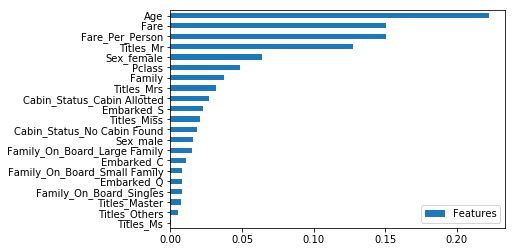

In [691]:
pd.DataFrame(rf.feature_importances_, index = dummytest.columns, columns = ["Features"]).sort_values(by = "Features").plot(kind = "barh")

In [696]:
params = {"n_estimators" :[50,100, 200, 500],
         "criterion":["gini", "entropy"],
         "max_depth" : [2,4,5,6,7,8],
         "max_features":["auto", "sqrt", "log2"],
         "oob_score":[True, False]}

In [699]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=rf, param_grid=params, cv = 5)

In [700]:
model = grid.fit(scaled_train, ytr)

In [701]:
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100, 'oob_score': False}


In [702]:
rf = RandomForestClassifier(criterion='gini', max_depth=8, 
                            max_features='auto', n_estimators=100, 
                            oob_score=False)

In [703]:
pred = rf.fit(scaled_train,ytr).predict(scaled_test)

In [704]:
solution = pd.DataFrame({"PassengerId":test.PassengerId, "Survived": pred})
solution.to_csv("RF NEW.csv", index = False) # 0.78947

In [200]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [201]:
pred = knn.fit(xtr,ytr).predict(dummytest)
solution = pd.DataFrame({"PassengerId":test.PassengerId, "Survived": pred})
solution.to_csv("KNN Titanic Model.csv", index = False) # 0.66985

In [706]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [707]:
pred = lg.fit(xtr,ytr).predict(scaled_test)
solution = pd.DataFrame({"PassengerId":test.PassengerId, "Survived": pred})
solution.to_csv("Log Titanic Model.csv", index = False) # 0.77033 | 0.71770

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [708]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()

In [709]:
pred = gbm.fit(scaled_train,ytr).predict(scaled_test)
solution = pd.DataFrame({"PassengerId":test.PassengerId, "Survived": pred})
solution.to_csv("GBM Titanic Model.csv", index = False) # 0.77511 |0.755

In [732]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[("RF", rf),("LG", lg), ("GBM", gbm), ("bagg", bag)])

In [713]:
pred = vc.fit(scaled_train,ytr).predict(scaled_test)
solution = pd.DataFrame({"PassengerId":test.PassengerId, "Survived": pred})
solution.to_csv("VC Titanic Model.csv", index = False) # 0.77511 | 0.78468

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [733]:
pred_vc = vc.fit(newdata, dummytrain.Survived).predict(newtest)
solution = pd.DataFrame({"PassengerId":test.PassengerId, "Survived": pred_vc})
solution.to_csv("VC Selective Feature Model.csv", index = False) # 0.78468

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


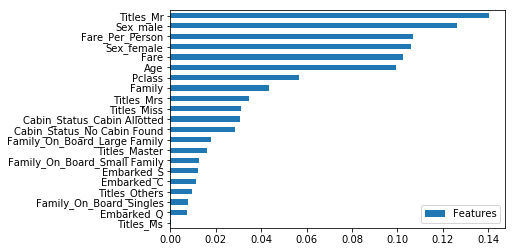

In [718]:
pd.DataFrame(rf.feature_importances_, index = dummytest.columns, columns = ["Features"]).sort_values(by="Features").plot(kind = "barh")
plt.show()

In [722]:
pd.DataFrame(rf.feature_importances_, index = dummytest.columns, columns = ["Features"]).sort_values(by = "Features", ascending = False).index

Index(['Titles_Mr', 'Sex_male', 'Fare_Per_Person', 'Sex_female', 'Fare', 'Age',
       'Pclass', 'Family', 'Titles_Mrs', 'Titles_Miss',
       'Cabin_Status_Cabin Allotted', 'Cabin_Status_No Cabin Found',
       'Family_On_Board_Large Family', 'Titles_Master',
       'Family_On_Board_Small Family', 'Embarked_S', 'Embarked_C',
       'Titles_Others', 'Family_On_Board_Singles', 'Embarked_Q', 'Titles_Ms'],
      dtype='object')

In [723]:
newdata = scaled_train.loc[:, ['Titles_Mr', 'Sex_male', 'Fare_Per_Person', 'Sex_female', 'Fare', 'Age',
       'Pclass', 'Family', 'Titles_Mrs', 'Titles_Miss']]

In [724]:
newtest = scaled_test.loc[:, ['Titles_Mr', 'Sex_male', 'Fare_Per_Person', 'Sex_female', 'Fare', 'Age',
       'Pclass', 'Family', 'Titles_Mrs', 'Titles_Miss']]

In [725]:
pred1 = rf.fit(newdata, dummytrain.Survived).predict(newtest)

In [726]:
solution = pd.DataFrame({"PassengerId":test.PassengerId, "Survived": pred1})
solution.to_csv("RF1 Model.csv", index = False) # 0.77990

In [727]:
# GBM Model
pred_gbm = gbm.fit(newdata, dummytrain.Survived).predict(newtest)
solution = pd.DataFrame({"PassengerId":test.PassengerId, "Survived": pred_gbm})
solution.to_csv("GBM Selective Feature Model.csv", index = False) # 0.77033

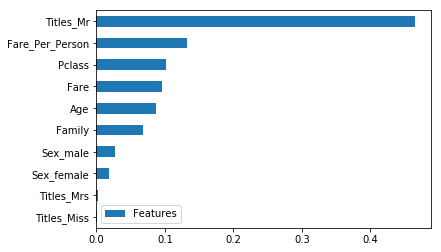

In [729]:
pd.DataFrame(gbm.feature_importances_, index = newtest.columns, columns = ["Features"]).sort_values(by="Features").plot(kind = "barh")
plt.show()

In [730]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier()

In [731]:
pred_bag = bag.fit(newdata, dummytrain.Survived).predict(newtest)
solution = pd.DataFrame({"PassengerId":test.PassengerId, "Survived": pred_bag})
solution.to_csv("BAGG Selective Feature Model.csv", index = False) # 0.73684

In [239]:
import scipy.stats as stats

In [251]:
# H0: There exists no relaitonship between the Survived and PClass
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency([dummytrain.Pclass, dummytrain.Survived])
print(p_value)

0.9999999999837883


In [305]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc = StandardScaler()

In [306]:
xtrain,xtest,ytrain,ytest = train_test_split(dummytrain.drop("Survived", axis = 1),
                                            dummytrain.Survived, test_size = 0.20, random_state = 1)

In [307]:
xtrain_scaled = pd.DataFrame(sc.fit_transform(xtrain), columns = xtrain.columns)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [310]:
xtest_scaled = pd.DataFrame(sc.transform(xtest), columns = xtest.columns)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [311]:
rf = RandomForestClassifier(criterion = 'gini', 
                            max_depth=6, 
                            max_features='auto')

In [312]:
rf.fit(xtrain,ytrain)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [314]:
pred = rf.predict(xtest)

In [315]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score

In [316]:
accuracy_score(ytest, pred)

0.7932960893854749

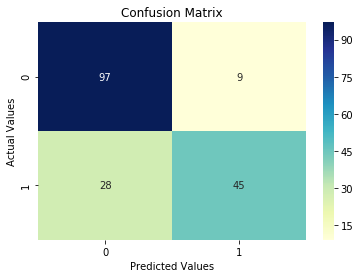

In [328]:
sns.heatmap(confusion_matrix(ytest, pred), annot = True, cmap = "YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

# About Confusion Matrix

1. A False Positive (type I error) — when you reject a true null hypothesis. For e.g. Null Hypothesis is that In Titanic, Jack Did Not Survive whereas the we assume that Jack Survived. This is False Positive. Another Example is that we know that Superheros don't exist in real world but we assume that they exist while watching movies like Spiderman, Superman etc. In Simple words, Assuming something when it is actually not.


2. A False Negative (type II error) — when you accept a false null hypothesis - Someone is telling a Lie and You Accept the Lie. It means you really did some mischief and you say that you did not.


3. Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.

###### Precision = TP/TP+FP


4. Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? We have got recall of 0.631 which is good for this model as it’s above 0.5.

###### Recall = TP/TP+FN

5. F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.701.

###### F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [338]:
# precision is TP/(TP+FP)
print("The Precision of 0 is {}".format(round(97/(97+28),2))) # Precision of 0

# Precision of 1
print("The Precision of 1 is {}".format(round(45/(45+9),2)))

The Precision of 0 is 0.78
The Precision of 1 is 0.83


In [348]:
print("The Recall of 0 is", round(97/(97+9),2))
print("The Recall of 1 is", round(45/(45+28),2))

# F1 Score = 2*(Recall * Precision) / (Recall + Precision)

The Recall of 0 is 0.92
The Recall of 1 is 0.62
0.725


In [319]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       106
           1       0.83      0.62      0.71        73

   micro avg       0.79      0.79      0.79       179
   macro avg       0.80      0.77      0.77       179
weighted avg       0.80      0.79      0.79       179



In [320]:
cohen_kappa_score(ytest, pred)

0.5539766987675938

### Using K Fold Cross Validation Set

from sklearn.model_selection import KFold 
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 


for train_index, test_index in kf.split(X):
      print("Train:", train_index, "Validation:",test_index)
      X_train, X_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

In [750]:
from sklearn.model_selection import RepeatedKFold 
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 

for train_index, test_index in kf.split(scaled_train):
    #print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = scaled_train[train_index], scaled_train[test_index] 
    y_train, y_test = ytr[train_index], ytr[test_index]

KeyError: "None of [Int64Index([  0,   3,   4,   5,   6,   7,   8,   9,  10,  11,\n            ...\n            880, 881, 882, 883, 884, 885, 886, 887, 888, 889],\n           dtype='int64', length=712)] are in the [columns]"

In [752]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

In [759]:
#rf = RandomForestClassifier(criterion='gini', max_depth=8, max_features='auto', n_estimators=100, oob_score=False)
#np.mean(cross_val_score(rf, scaled_train, ytr, cv = 100)) # cv = 50 - 0.8317483660130719, 100 - 0.83552
np.mean(cross_val_score(gbm, scaled_train, ytr, cv = 100)) # cv: 100 - 0.82588

0.8258888888888889

### Tune GBM and Try on Whole Dataset

In [760]:
params = {"loss":["deviance", "exponential"],
         "learning_rate":[0.1, 0.5, 0.9, 1],
         "n_estimators":[100, 200, 300, 500],
         "max_depth":[2,4,5,6,7,8],
         "max_features":["auto", "sqrt", "log2"]}

In [761]:
grid = GridSearchCV(estimator=gbm, param_grid=params, cv = 10)

In [762]:
grid.fit(scaled_train, ytr)
print(grid.best_params_)

{'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 300}


In [765]:
gbm = GradientBoostingClassifier(learning_rate=0.1, loss='exponential', 
                                 max_depth=2, max_features='auto', n_estimators=100)

In [766]:
model_gbmfit = gbm.fit(scaled_train,ytr).predict(scaled_test)
solution = pd.DataFrame({"PassengerId":test.PassengerId, "Survived": model_gbmfit})
solution.to_csv("GBM Tuned.csv", index = False) # 0.7655 on 300 Trees, 0.77990 for 100 Trees

### Voting Classifier on Tuned RF and GBM

In [802]:
vc = VotingClassifier(estimators=[("RF", rf),("GBM", gbm), ("xgb", model)])

In [804]:
model_vcfit = vc.fit(scaled_train,ytr).predict(scaled_test)
solution = pd.DataFrame({"PassengerId":test.PassengerId, "Survived": model_vcfit})
solution.to_csv("VC Tuned.csv", index = False) # 0.79425

### Adaboost - Grid Search

In [770]:
# Finding the Parameters of Adaboost
boostparam={
    "base_estimator":[rf],
    "n_estimators":[50,75,100],
    "learning_rate":[1,2,3,4,5],
    "algorithm":["SAMME", "SAMME.R"],
    "random_state" : [123]
}

In [772]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
grid = GridSearchCV(estimator = ada, param_grid=boostparam, cv = 10)

In [798]:
from xgboost.sklearn import XGBClassifier
model = XGBClassifier(learning_rate=0.001,n_estimators=2500,
                                max_depth=5, min_child_weight=0,
                                gamma=0, subsample=0.7,
                                colsample_bytree=0.7,
                                scale_pos_weight=1, seed=27,
                                reg_alpha=0.00006)

In [799]:
model_XGBfit = model.fit(scaled_train,ytr).predict(scaled_test)
solution = pd.DataFrame({"PassengerId":test.PassengerId, "Survived": model_XGBfit})
solution.to_csv("XGB Tuned.csv", index = False) #0.79904

In [810]:
np.mean(cross_val_score(model, scaled_train, ytr, cv = 65))

0.8387996618765848

In [811]:
model_XGBfit = model.predict(scaled_test)
solution = pd.DataFrame({"PassengerId":test.PassengerId, "Survived": model_XGBfit})
solution.to_csv("XGB Tuned.csv", index = False) #0.79904

In [813]:
params = {"learning_rate":[0.1, 0.01, 0.001],"n_estimators":[1000, 500, 2000, 2500, 2800, 3000],
                                "max_depth":[3,4,5,6], "min_child_weight":[0,1]}

In [814]:
grid = GridSearchCV(estimator=model, param_grid=params, cv = 10)

In [815]:
grid.fit(scaled_train, ytr)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.001,
       max_delta_step=0, max_depth=5, min_child_weight=0, missing=None,
       n_estimators=2500, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=6e-05,
       reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.7),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [1000, 500, 2000, 2500, 2800, 3000], 'max_depth': [3, 4, 5, 6], 'min_child_weight': [0, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [816]:
grid.best_params_

{'learning_rate': 0.001,
 'max_depth': 6,
 'min_child_weight': 0,
 'n_estimators': 1000}

In [844]:
xgb = XGBClassifier(learning_rate=0.001,max_depth=8,n_estimators=1000, 
                    min_child_weight=0,gamma=0, subsample=0.7,colsample_bytree=0.7,scale_pos_weight=1, seed=2019,
                                reg_alpha=0.00006)

In [845]:
np.mean(cross_val_score(xgb, scaled_train, ytr, cv = 10))

0.841756327318125

In [846]:
model_XGBfit = xgb.fit(scaled_train,ytr).predict(scaled_test)
solution = pd.DataFrame({"PassengerId":test.PassengerId, "Survived": model_XGBfit})
solution.to_csv("XGB Tuned.csv", index = False) #0.80382 when n estimators is 1000 and depth is 6

### Considering Multicollinearity in cat variables.

We will drop first cat col to deter from Multicollinearity

In [78]:
newtrain = newtrain.drop("titles" , axis = 1)
newtest = newtest.drop("titles" , axis = 1)

In [79]:
newtest.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Cabin_Status', 'Titles',
       'Family', 'Family_On_Board', 'Fare_Per_Person'],
      dtype='object')

In [80]:
dummytrain = pd.get_dummies(newtrain,drop_first = True)
dummytest = pd.get_dummies(newtest, drop_first=True)

In [81]:
print(dummytrain.shape)
print(dummytest.shape)

(891, 17)
(418, 16)


In [82]:
xtr = dummytrain.drop("Survived", axis =1)
ytr = dummytrain.Survived

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

scaled_train = pd.DataFrame(sc.fit_transform(xtr), columns = xtr.columns)

scaled_test = pd.DataFrame(sc.transform(dummytest), columns = dummytest.columns)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [83]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier(learning_rate=0.001,max_depth=8,n_estimators=1000, 
                    min_child_weight=0,gamma=0, subsample=0.7,colsample_bytree=0.7,scale_pos_weight=1, seed=2019,
                                reg_alpha=0.00006)

model_XGBfit = xgb.fit(scaled_train,ytr).predict(scaled_test)
solution = pd.DataFrame({"PassengerId":test.PassengerId, "Survived": model_XGBfit})
solution.to_csv("XGB Tuned.csv", index = False) #0.79425

In [99]:
# Importing Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"]= [variance_inflation_factor(xtr.values, i) for i in range(xtr.shape[1])]
vif["features"] = xtr.columns

In [106]:
vif.sort_values(by="VIF Factor", ascending=False)

,VIF Factor,features
5,48.842873,Sex_male
14,37.314450,Family_On_Board_Singles
0,24.894882,Pclass
10,19.435436,Titles_Mr
9,16.329017,Titles_Miss
2,14.416153,Fare
4,12.562370,Fare_Per_Person
11,12.205314,Titles_Mrs
1,10.297883,Age
8,9.622599,Cabin_Status_No Cabin Found


In [108]:
newxtr = xtr.drop(["Sex_male", "Family_On_Board_Singles", "Pclass", "Titles_Mr",
                  "Titles_Miss", "Fare"], axis = 1)

In [107]:
newdummytest = dummytest.drop(["Sex_male", "Family_On_Board_Singles", "Pclass", "Titles_Mr",
                  "Titles_Miss", "Fare"], axis = 1)

In [109]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()

scaled_train = pd.DataFrame(sc1.fit_transform(newxtr), columns = newxtr.columns)

scaled_test = pd.DataFrame(sc1.transform(newdummytest), columns = newdummytest.columns)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [115]:
from sklearn.model_selection import GridSearchCV
params = {"learning_rate":[0.1, 0.01, 0.001],
          "n_estimators":[1000, 500, 2000, 2500],
          "max_depth":[3,4,5,6], 
          "min_child_weight":[0,1]}
xgb = XGBClassifier()

grid = GridSearchCV(estimator=xgb, param_grid=params, cv = 10)
grid.fit(scaled_train, ytr)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [1000, 500, 2000, 2500], 'max_depth': [3, 4, 5, 6], 'min_child_weight': [0, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [116]:
grid.best_params_

{'learning_rate': 0.01,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 500}

In [118]:
xgb = XGBClassifier(learning_rate=0.01,max_depth=6,n_estimators=500, 
                    min_child_weight=1)

model_XGBfit = xgb.fit(scaled_train,ytr).predict(scaled_test)
solution = pd.DataFrame({"PassengerId":test.PassengerId, "Survived": model_XGBfit})
solution.to_csv("XGB Tuned.csv", index = False) #0.68899

### Conclusion

1. Multicollinearity treatment in the case of titanic did not work well. Lost the accuracy.
2. Need to check the variables if they are contributing significantly to the model else we will use vital information from the data and hence model will be a worse model like we see above.

3. Multicollinearity in categorical variables is a reality but we need to see if the variables are contributing to the model. If yes, then we need not remove the variable per se.


### Recursive Feature Elimination

1. Recursive - Doing same thing several times.

2. Feature - Set of Columns

3. Cross-Validation — a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. Use cross-validation to detect overfitting, ie, failing to generalize a pattern.


##### How RFE Works

1. As previously noted, recursive feature elimination (RFE, Guyon et al. (2002)) is basically a backward selection of the predictors. This technique begins by building a model on the entire set of predictors and computing an importance score(grid score) for each predictor. 

2. The least important predictor(s) are then removed, the model is re-built, and importance scores are computed again. In practice, the analyst specifies the number of predictor subsets to evaluate as well as each subset’s size. 

3. Therefore, the subset size is a tuning parameter for RFE. The subset size that optimizes the performance criteria is used to select the predictors based on the importance rankings. The optimal subset is then used to train the final model.

In [119]:
# Finding Correlated Features

correlated_features = set()
correlation_matrix = dummytrain.drop("Survived", axis =1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [120]:
correlated_features

{'Fare_Per_Person', 'Titles_Mr'}

### Applying Recursive Feature Elimination

1. You will need to declare two variables — X and target where first represents all the features, and the second represents the target variable. 

2. Then you’ll make an instance of the Machine learning algorithm (I’m using RandomForests). In it, you can optionally pass a random state seed for reproducibility. Now you can create an instance of RFECV, here are needed arguments:

   * estimator — your model instance

   * step — number of features to remove at each iteration

   * cv — your Cross-Validation, use StratifiedKFold and set K to 10

   * scoring — scoring metric, what you want to optimize for. I’ve used ‘accuracy’ but you can select any other

In [173]:
## Applying RFE

X = dummytrain.drop(['Survived', 'Fare_Per_Person', 'Titles_Mr'], axis=1)
target = dummytrain['Survived']

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

rf = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=xgb, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
   estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

In [174]:
print("Optimal No of Features {}".format(rfecv.n_features_))
# These are the Ideal Features for the Model

Optimal No of Features 5


1. rfecv.grid_scores_ - These are the cross validation scores for every feature. 

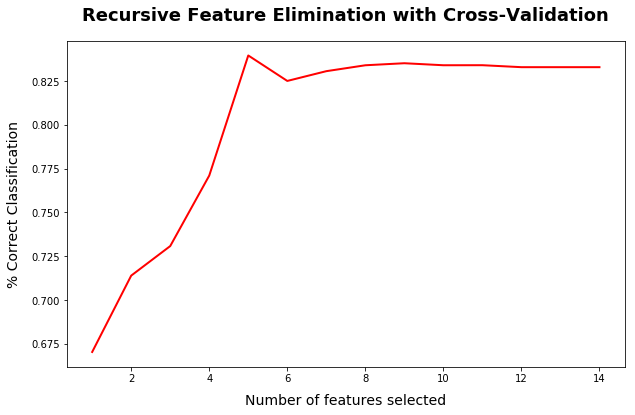

In [175]:
# Plotting Accuracy with every feature
plt.figure(figsize=(10, 6))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, 
          fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad = 10)
plt.ylabel('% Correct Classification', fontsize=14, labelpad = 10)
plt.plot(range(1, len(rfecv.grid_scores_)+1), 
         rfecv.grid_scores_, color='red', linewidth=2)

plt.show()

print out which features are considered to be least important and drop them with this snippet:

In [176]:
print(np.where(rfecv.support_ == False)[0])

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[ 5  6  7  8  9 10 11 12 13]


In [177]:
X.head()

,Pclass,Age,Fare,Family,Sex_male
0,3,22.0,7.2500,1,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,1,1


In [178]:
X.columns

Index(['Pclass', 'Age', 'Fare', 'Family', 'Sex_male'], dtype='object')

In [179]:
from sklearn.preprocessing import StandardScaler
sc2 = StandardScaler()

In [180]:
scaled_x = sc2.fit_transform(X)

In [181]:
scaled_test = sc2.transform(dummytest.loc[:, X.columns])

In [157]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()

In [182]:
pred = xgb.fit(scaled_x, target).predict(scaled_test)

In [183]:
solution = pd.DataFrame({"PassengerId":test.PassengerId, "Survived": pred})
solution.to_csv("XGB POST RFE.csv", index = False) #0.77033

In [184]:
rfecv.grid_scores_

array([0.67036914, 0.71393769, 0.73079191, 0.77101691, 0.83953382,
       0.8250017 , 0.83057003, 0.8339411 , 0.83510243, 0.8339533 ,
       0.83397855, 0.83285495, 0.83285495, 0.83285495])